In [79]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [80]:
'''
EMAIL SPAM DETECTION
'''
metric_data=[] 
# ths lost will contain the acuuracy, precision, recall, f1 score of each of the classifier algorithms after best optimizatoion

In [81]:
# loading the dataset and storing it in dataframe
data=pd.read_csv(r'Python and ML/spam.csv',encoding='latin-1')

In [82]:
print(data.head())
print(data.info())
print(data.describe())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5577 entries, 0 to 5576
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5577 non-null   object
 1   v2          5577 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

In [83]:
# listing all the columns
list1=data.columns[:]
list1

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [84]:
# chaecking for null values
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5527
Unnamed: 3    5565
Unnamed: 4    5571
dtype: int64

In [85]:
# removing unwanted columns
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [86]:
#renaming column names
data.rename(columns={'v1':'Category','v2':'Email'},inplace=True)

In [87]:
# removing duplicate rows
print(data.describe())
data=data.drop_duplicates()
print(data.describe())

       Category                   Email
count      5577                    5577
unique        2                    5174
top         ham  Sorry, I'll call later
freq       4825                      30
       Category                                              Email
count      5174                                               5174
unique        2                                               5174
top         ham  Go until jurong point, crazy.. Available only ...
freq       4516                                                  1


/var/folders/sr/xggt0wqj371cks38jp61y2100000gn/T/ipykernel_96108/2217951315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="Category",data=data,palette=colors)


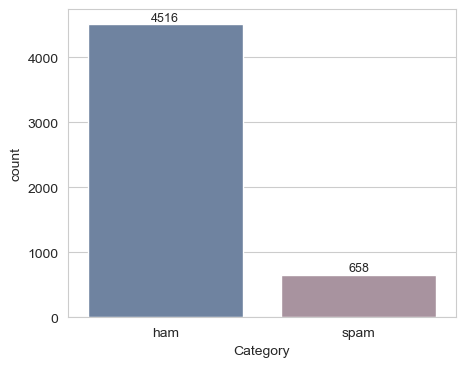

In [88]:
# checking how many spam and non spam mails are there
colors =["#6782a8", "#ab90a0" ]
plt.figure(figsize=(5,4))
ax=sns.countplot(x="Category",data=data,palette=colors)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + 0.1, 
            '{:.0f}'.format(p.get_height()), 
            ha='center', va='bottom', fontsize=9)
sns.set_style('whitegrid')
plt.show()

In [89]:
# enclabel_encoderoding categorical data -> Category
label_encoder=LabelEncoder() # label_encoder is an object of class LabelEncoder
data['Category']=label_encoder.fit_transform(data['Category'])

In [90]:
data.head() # 0 for not spam and 1 for spam

,Category,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
'''
Text Data Preprocessing: tokenisation,lowercasing,removing special characters, removing stopwords, removing punctuations,removing numbers,
lemmatization
'''
#importing required libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re # a module used for data preprocessing

nltk.download('stopwords')  # dowloads the stopwords eg. the ,a, an ,is
nltk.download('punkt')  # for tokenization
nltk.download('wordnet') # Downloading WordNet is necessary for using NLTK's lemmatization tools, 
#which rely on the database to transform words into their base or root forms. Lemmatization uses WordNet 
#to ensure that the resulting base form is a valid word in the language.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkarsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/utkarsh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/utkarsh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [92]:
data.head()

,Category,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
# preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ''

    #lowercasing the text
    text=text.lower()

    #removing punctuations and special characters from the text also numbers
    text=re.sub(r"[^a-zA-Z\s]","",text)# syntax-> re.sub(pattern to be replaced,replacement, string on which it is applied)
    # ^ denotes not / false ... ^a-zA-Z\s denotes replace a character which is not a-z A-Z or space

    #tokenization into words
    text=word_tokenize(text)

    #removing stopwords
    stop_words=set(stopwords.words('English')) # set of all stopwords
    text=[word for word in text if word not in stop_words]
    '''
    or
    for word in stop_words:
        if word in stop_words:
            text.remove(word) 
    '''

    # lemmatization
    lemmatizer=WordNetLemmatizer() # creating object
    text=[lemmatizer.lemmatize(word) for word in text]

    #for vectorization in further steps we need to convert the list of words back into string
    text=' '.join(text)
    return text

data['Email']=data['Email'].apply(preprocess_text)


In [94]:
# stop_words=set(stopwords.words('english'))
# print(type(stop_words)) => <class 'set'>

In [95]:
# checking whether data has been processed or not
data.head(100)

,Category,Email
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though
...,...,...
95,1,free ringtone waiting collected simply text pa...
96,0,watching telugu moviewat abt u
97,0,see finish load loan pay
98,0,hi wk ok hols yes bit run forgot hairdresser a...


In [96]:
'''
Text Vectorization
'''
from sklearn.feature_extraction.text import CountVectorizer
#creating object
vectorizer=CountVectorizer()

#separting into x and y
x=vectorizer.fit_transform(data['Email'])
y=data['Category']


In [97]:
# splitting the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [98]:
# classification algorithms
classifiers={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest':RandomForestClassifier(class_weight='balanced'),
    'Support Vector Machine':SVC(class_weight='balanced'),
    'K-Nearest Neigbors':KNeighborsClassifier(),
    'Naive Bayes':MultinomialNB()
}

LOGISTIC REGRESSION



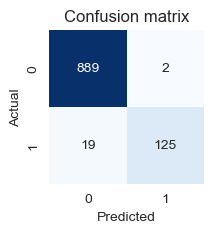

Logistic Regression accuracy: 97.97101449275362
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       891
           1       0.98      0.87      0.92       144

    accuracy                           0.98      1035
   macro avg       0.98      0.93      0.96      1035
weighted avg       0.98      0.98      0.98      1035

--------------------------------------------------------------------------------------------------
DECISION TREE



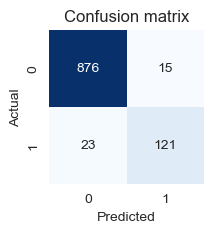

Decision Tree accuracy: 96.32850241545894
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       891
           1       0.89      0.84      0.86       144

    accuracy                           0.96      1035
   macro avg       0.93      0.91      0.92      1035
weighted avg       0.96      0.96      0.96      1035

--------------------------------------------------------------------------------------------------
RANDOM FOREST



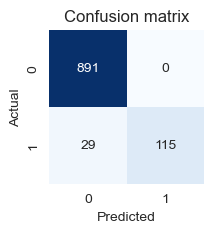

Random Forest accuracy: 97.19806763285024
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       891
           1       1.00      0.80      0.89       144

    accuracy                           0.97      1035
   macro avg       0.98      0.90      0.94      1035
weighted avg       0.97      0.97      0.97      1035

--------------------------------------------------------------------------------------------------
SUPPORT VECTOR MACHINE



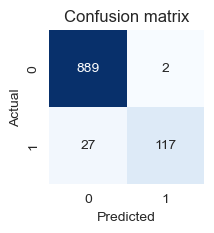

Support Vector Machine accuracy: 97.19806763285024
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       891
           1       0.98      0.81      0.89       144

    accuracy                           0.97      1035
   macro avg       0.98      0.91      0.94      1035
weighted avg       0.97      0.97      0.97      1035

--------------------------------------------------------------------------------------------------
K-NEAREST NEIGBORS



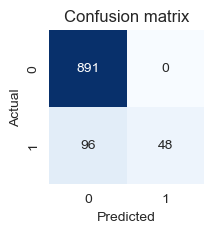

K-Nearest Neigbors accuracy: 90.72463768115942
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       891
           1       1.00      0.33      0.50       144

    accuracy                           0.91      1035
   macro avg       0.95      0.67      0.72      1035
weighted avg       0.92      0.91      0.89      1035

--------------------------------------------------------------------------------------------------
NAIVE BAYES



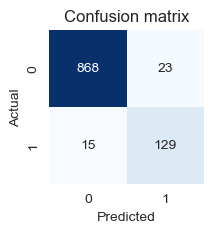

Naive Bayes accuracy: 96.32850241545894
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       891
           1       0.85      0.90      0.87       144

    accuracy                           0.96      1035
   macro avg       0.92      0.94      0.93      1035
weighted avg       0.96      0.96      0.96      1035

--------------------------------------------------------------------------------------------------


In [99]:
# training and evaluating classifiers
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
results={}

for name,clf in classifiers.items():
    print(f"{name.upper()}\n")
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test) # predicting values for x_test
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm,annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name} accuracy: {accuracy*100}")
    print(classification_report(y_test,y_pred))
    if name=='Logistic Regression'or name=='Random Forest':
        metric_data.append([accuracy,recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)])
    print("--------------------------------------------------------------------------------------------------")
    

In [100]:
'''
Over-Sampling and Under-Sampling not enhancing the accuracy
'''

'\nOver-Sampling and Under-Sampling not enhancing the accuracy\n'

In [101]:
'''THROUGH BAGGING  DECISION TREE ACCURACY GOT IMPROVED =>  original accuracy=96.328 to 97.294''' 
from sklearn.ensemble import BaggingClassifier

# Initialize base model (e.g., Decision Tree)
base_model = DecisionTreeClassifier(random_state=52)

# Initialize Bagging Classifier with base model
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=52)

# Train the Bagging Classifier
bagging_model.fit(x_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

metric_data.append([accuracy,recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)])

Accuracy: 97.29468599033815


In [102]:
'''
applying ADABOOST on DECISION TREE with Grid Search =>  original accuracy=96.328 to 95.942
'''
from sklearn.ensemble import AdaBoostClassifier
param_grid={
    # 'max_depth':[None,3,4,5,6,7],
    # 'criterion':['gini','entropy'],
    # 'splitter': ['best', 'random'],
    # 'min_samples_split': [2, 10, 20],
    # 'min_samples_leaf': [1, 5, 10],
    # 'max_features': [None, 'auto', 'sqrt', 'log2'],
    # 'max_leaf_nodes': [None, 5, 10, 20]
    'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':[40,50,555,60,70]
}

base_model = DecisionTreeClassifier(random_state=42)
adaboost_clf=AdaBoostClassifier(estimator=base_model, random_state=42)

grid_search=GridSearchCV(adaboost_clf,param_grid,cv=5,scoring='accuracy',verbose=1)

In [103]:
#applying grid search
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [40, 50, 555, 60, 70]},
             scoring='accuracy', verbose=1)

In [104]:
best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(best_estimator)

Best Parameters: {'learning_rate': 0.001, 'n_estimators': 40}
AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                   learning_rate=0.001, n_estimators=40, random_state=42)


In [105]:
# prediction on test set
y_pred=best_estimator.predict(x_test) # predicting values for x_test

#evaluating Performance
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix: \n{cm}")
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy: {accuracy*100}")
print(classification_report(y_test,y_pred))

Confusion matrix: 
[[874  17]
 [ 25 119]]
accuracy: 95.94202898550725
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       891
           1       0.88      0.83      0.85       144

    accuracy                           0.96      1035
   macro avg       0.92      0.90      0.91      1035
weighted avg       0.96      0.96      0.96      1035



In [106]:
'''
GRID SEARCH + ADABOOSTING ON LOGISTIC REGRESSION : original (simple): 97.971 to 97.29
decreased accuracy
'''
from sklearn.ensemble import AdaBoostClassifier
param_grid={
    # 'max_depth':[None,3,4,5,6,7],
    'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':[40,50,55,60,70],
    'algorithm': ['SAMME', 'SAMME.R']
}

base_model =LogisticRegression(random_state=42)
adaboost_clf=AdaBoostClassifier(estimator=base_model, random_state=42)

grid_search=GridSearchCV(adaboost_clf,param_grid,cv=5,scoring='accuracy',verbose=1)

#applying grid search
grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(best_estimator)
print('\n')

# prediction on test set
y_pred=best_estimator.predict(x_test) # predicting values for x_test

#evaluating Performance
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix: \n{cm}")
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy: {accuracy*100}")
print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 55}
AdaBoostClassifier(algorithm='SAMME',
                   estimator=LogisticRegression(random_state=42),
                   learning_rate=1, n_estimators=55, random_state=42)


Confusion matrix: 
[[884   7]
 [ 21 123]]
accuracy: 97.29468599033815
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       891
           1       0.95      0.85      0.90       144

    accuracy                           0.97      1035
   macro avg       0.96      0.92      0.94      1035
weighted avg       0.97      0.97      0.97      1035



In [107]:
'''
GRID SEARCH + ADABOOSTING ON RANDOM FOREST : original (simple): 97.198 to 97.005 which is actually slightly decreasing
decreased accuracy
'''
from sklearn.ensemble import AdaBoostClassifier
param_grid={
    # 'max_depth':[None,3,4,5,6,7],
    'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':[40,50,55,60,70],
    'algorithm': ['SAMME', 'SAMME.R']
}

base_model = RandomForestClassifier(random_state=42)
adaboost_clf=AdaBoostClassifier(estimator=base_model, random_state=42)

grid_search=GridSearchCV(adaboost_clf,param_grid,cv=5,scoring='accuracy',verbose=1)

#applying grid search
grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(best_estimator)
print('\n')

# prediction on test set
y_pred=best_estimator.predict(x_test) # predicting values for x_test

#evaluating Performance
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix: \n{cm}")
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy: {accuracy*100}")
print(classification_report(y_test,y_pred))


Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 40}
AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(random_state=42),
                   learning_rate=0.001, n_estimators=40, random_state=42)


Confusion matrix: 
[[891   0]
 [ 31 113]]
accuracy: 97.0048309178744
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       891
           1       1.00      0.78      0.88       144

    accuracy                           0.97      1035
   macro avg       0.98      0.89      0.93      1035
weighted avg       0.97      0.97      0.97      1035



In [108]:
'''
GRID SEARCH ON SVC : original accuracy=97.198 to 97.294
decreased accuracy
'''


base_model=SVC(random_state=42)
   
param_grid = {
    'C': [0.1, 1, 10, 100],                # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],        # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly'],   # Specifies the kernel type to be used in the algorithm
    'degree': [2, 3, 4, 5]                 # Degree of the polynomial kernel function (only relevant for 'poly')
}

grid_search=GridSearchCV(base_model,param_grid,cv=5,scoring='accuracy',verbose=1)
    
#applying grid search
grid_search.fit(x_train,y_train)
    
best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

# prediction on test set
y_pred=best_estimator.predict(x_test) # predicting values for x_test

#evaluating Performance
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix: \n{cm}")
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy: {accuracy*100}")
print(classification_report(y_test,y_pred))


metric_data.append([accuracy,recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)])



Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
Confusion matrix: 
[[882   9]
 [ 19 125]]
accuracy: 97.29468599033815
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       891
           1       0.93      0.87      0.90       144

    accuracy                           0.97      1035
   macro avg       0.96      0.93      0.94      1035
weighted avg       0.97      0.97      0.97      1035



In [109]:
'''
GRID SEARCH ON NAIVE BAYES : original accuracy= 96.32 to 96.425

'''


base_model=MultinomialNB()
   
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # Additive smoothing parameter
    'fit_prior': [True, False]            # Whether to learn class prior probabilities or not
}

grid_search=GridSearchCV(base_model,param_grid,cv=5,scoring='accuracy',verbose=1)
    
#applying grid search
grid_search.fit(x_train,y_train)
    
best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

# prediction on test set
y_pred=best_estimator.predict(x_test) # predicting values for x_test

#evaluating Performance
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix: \n{cm}")
accuracy=accuracy_score(y_test,y_pred)
print(f"{name} accuracy: {accuracy*100}")
print(classification_report(y_test,y_pred))


print(type(classification_report(y_test,y_pred)))

metric_data.append([accuracy,recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'alpha': 5.0, 'fit_prior': True}
Confusion matrix: 
[[884   7]
 [ 30 114]]
Naive Bayes accuracy: 96.42512077294685
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       891
           1       0.94      0.79      0.86       144

    accuracy                           0.96      1035
   macro avg       0.95      0.89      0.92      1035
weighted avg       0.96      0.96      0.96      1035

<class 'str'>


In [110]:
'''
GRID SEARCH ON KNN : original accuracy= 90.712 to 93.043

'''


base_model=KNeighborsClassifier()
   
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],    # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric to use
}

grid_search=GridSearchCV(base_model,param_grid,cv=5,scoring='accuracy',verbose=1)
    
#applying grid search
grid_search.fit(x_train,y_train)
    
best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

# prediction on test set
y_pred=best_estimator.predict(x_test) # predicting values for x_test

#evaluating Performance
cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix: \n{cm}")
accuracy=accuracy_score(y_test,y_pred)
print(f"{name} accuracy: {accuracy*100}")
print(classification_report(y_test,y_pred))


metric_data.append([accuracy,recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)])



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Confusion matrix: 
[[890   1]
 [ 71  73]]
Naive Bayes accuracy: 93.04347826086956
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       891
           1       0.99      0.51      0.67       144

    accuracy                           0.93      1035
   macro avg       0.96      0.75      0.82      1035
weighted avg       0.93      0.93      0.92      1035



In [111]:
'''
Logistic Regression accuracy=97.969
Decision Tree maximum accuracy achieved after bagging=97.098
Random Forest maximum accuracy achieved after grid search + adaboosting= 97.29
SVC maximum accuracy achieved after grid search=97.871
Naive Bayes maximum accuracy achieved after grid search=96.518
KNN maximum accuracy achieved after Grid Search =93.133
'''

'\nLogistic Regression accuracy=97.969\nDecision Tree maximum accuracy achieved after bagging=97.098\nRandom Forest maximum accuracy achieved after grid search + adaboosting= 97.29\nSVC maximum accuracy achieved after grid search=97.871\nNaive Bayes maximum accuracy achieved after grid search=96.518\nKNN maximum accuracy achieved after Grid Search =93.133\n'

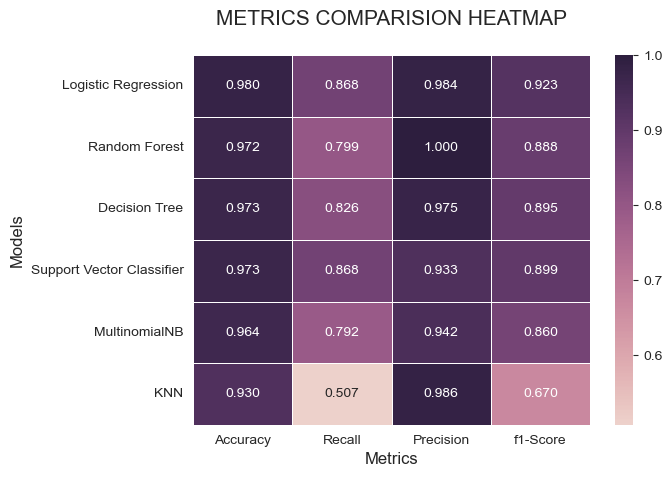

In [112]:
'''
METRICS COMPARISION HEATMAP
'''
xticklabels=['Accuracy','Recall','Precision','f1-Score']
yticklabels=['Logistic Regression','Random Forest','Decision Tree','Support Vector Classifier','MultinomialNB','KNN']
sns.heatmap(metric_data,annot=True,fmt='.3f',xticklabels=xticklabels,yticklabels=yticklabels,cmap=sns.cubehelix_palette(as_cmap=True),linewidths=0.5, linecolor='white')
plt.xlabel("Metrics",fontsize=12)
plt.ylabel("Models",fontsize=12)
plt.title('METRICS COMPARISION HEATMAP\n',fontsize=15)
plt.show()

In [117]:
best_estmator=LogisticRegression()
spam=input("Enter the message or Email: \n")
spam=vectorizer.transform([spam])
prediction=best_estimator.predict(spam)
if prediction[0]==1:
    print("\nSPAM MESSAGE")
else:
    print("\nNON SPAM MESSAGE")

Enter the message or Email: 
 Want to make $10,000 a week working from home? Sign up now and start earning big money!



SPAM MESSAGE
